# DACON 컴퓨터 비전 학습 경진대회
### 2020.08.03 ~ 2020.09.14 17:59

## Python import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import os


## Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

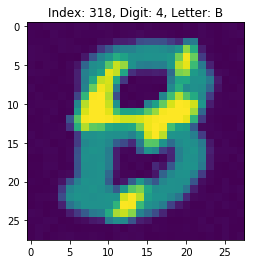

In [3]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [4]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [5]:
x_val = x_train[-int(len(x_train)*0.2):]
y_val = y_train[-int(len(y_train)*0.2):]
x_train = x_train[:-int(len(x_train)*0.2)]
y_train = y_train[:-int(len(y_train)*0.2)]

In [6]:
print(str(x_val.shape))
print(str(y_val.shape))
print(str(x_train.shape))
print(str(y_train.shape))

(409, 28, 28, 1)
(409, 10)
(1639, 28, 28, 1)
(1639, 10)


In [11]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128,kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model
    
model = create_cnn_model(x_train)

In [30]:
num_classes = 10

model = Sequential([
  layers.Input(x_train.shape[1:]),

  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.BatchNormalization(),
  layers.Dense(1000, activation='relu'),
  
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation='softmax')
])

In [7]:
num_classes = 10

model = Sequential([

  layers.Input(x_train.shape[1:]),
  
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    featurewise_std_normalization=True,
    # width_shift_range=0.2,
    # height_shift_range=0.2
    )

In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
    )

In [32]:
MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_accuracy:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy', verbose=1, save_best_only = True)

In [28]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, callbacks=[cb_checkpoint])

Train on 1639 samples, validate on 409 samples
Epoch 1/20
1639/1639 [==============================] - 3s 2ms/sample - loss: 2.9840 - accuracy: 0.4118 - val_loss: 5.7238 - val_accuracy: 0.1076
Epoch 2/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.8738 - accuracy: 0.7047 - val_loss: 10.3080 - val_accuracy: 0.1076
Epoch 3/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.5109 - accuracy: 0.8286 - val_loss: 10.8498 - val_accuracy: 0.1076
Epoch 4/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.3367 - accuracy: 0.8877 - val_loss: 14.0600 - val_accuracy: 0.1076
Epoch 5/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.2964 - accuracy: 0.8969 - val_loss: 13.4800 - val_accuracy: 0.1076
Epoch 6/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.2359 - accuracy: 0.9207 - val_loss: 14.4511 - val_accuracy: 0.1076
Epoch 7/20
1639/1639 [==============================] - 2s 1ms/sample - 

In [36]:
epochs=10
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    validation_data=(x_val, y_val), 
    epochs = epochs,
    callbacks=[cb_checkpoint])

  ...
    to  
  ['...']
Train for 51.21875 steps, validate on 409 samples
Epoch 1/10
51/51 [============================>.] - ETA: 0s - loss: 0.0574 - accuracy: 0.9844
Epoch 00001: val_accuracy improved from 0.76528 to 0.77506, saving model to ./model/01-0.7751.hdf5
52/51 [==============================] - 4s 78ms/step - loss: 0.0587 - accuracy: 0.9835 - val_loss: 1.0814 - val_accuracy: 0.7751
Epoch 2/10
51/51 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9894
Epoch 00002: val_accuracy did not improve from 0.77506
52/51 [==============================] - 2s 43ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 1.0877 - val_accuracy: 0.7604
Epoch 3/10
51/51 [============================>.] - ETA: 0s - loss: 0.0228 - accuracy: 0.9975
Epoch 00003: val_accuracy did not improve from 0.77506
52/51 [==============================] - 2s 43ms/step - loss: 0.0225 - accuracy: 0.9976 - val_loss: 1.0578 - val_accuracy: 0.7628
Epoch 4/10
51/51 [==========================

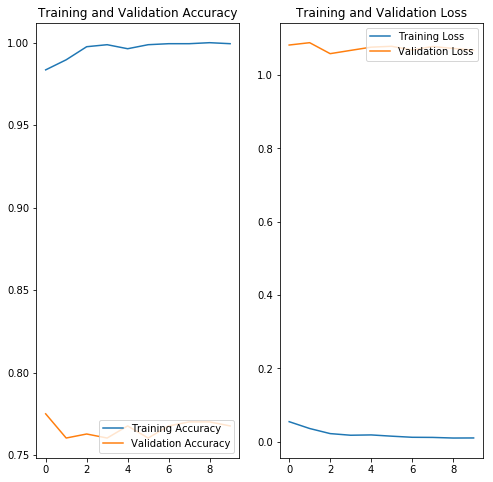

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict

In [39]:
model = keras.models.load_model('./model/01-0.7751.hdf5')

In [40]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,8
2,2051,8
3,2052,0
4,2053,3


In [41]:
submission.to_csv('08241530(dropout0.25+data_aug).csv', index=False)